### Import Neccesary Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Load the dataset 

In [41]:
# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\Sukumar\Downloads\titanic_dataset.csv")

In [47]:
#Diasplay the loaded dataset
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Explore the Dataset

In [43]:
# Display the top 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
# Data Types and Missing Values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning 

In [48]:
# Check the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
# Fill the age column with the mean 
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [50]:
# fill the Embarked column with the Mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [51]:
# drop the Unnecessary
df.drop(['PassengerId','Name','Ticket', 'Cabin'], axis= 1, inplace = True)

In [61]:
#Feature Engineering
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature 'IsAlone'
df['IsAlone'] = np.where(df['FamilySize'] == 1,  1, 0)

In [62]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,29.699118,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


### Exploratory Data Analysis(EDA)

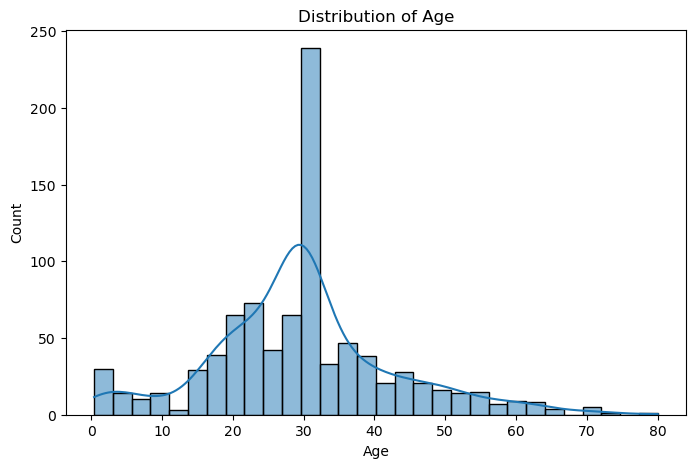

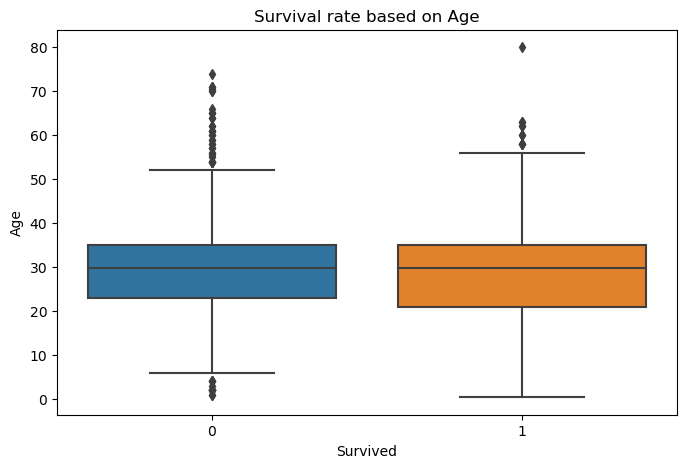

In [55]:
# Analyzing Numerical Variables

# Distribution of age 
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde = True)
plt.title('Distribution of Age')
plt.show()

# Survival rate based on age 
plt.figure(figsize=(8,5))
sns.boxplot(x = 'Survived', y = 'Age', data=df)
plt.title('Survival rate based on Age')
plt.show()

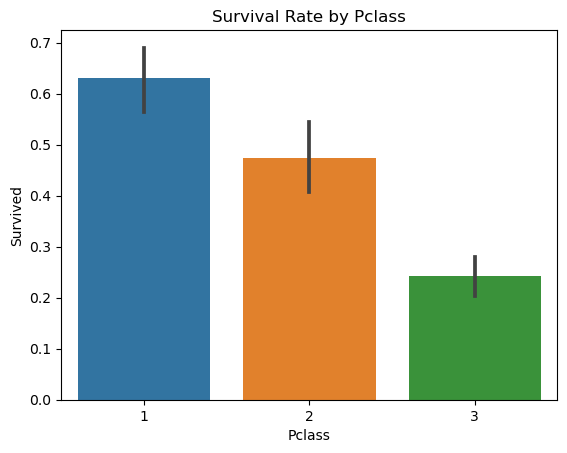

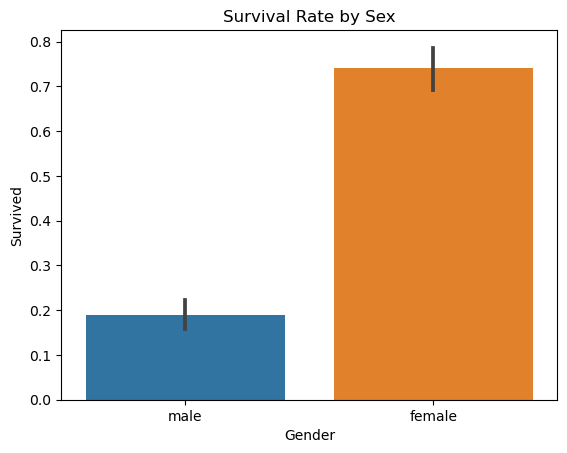

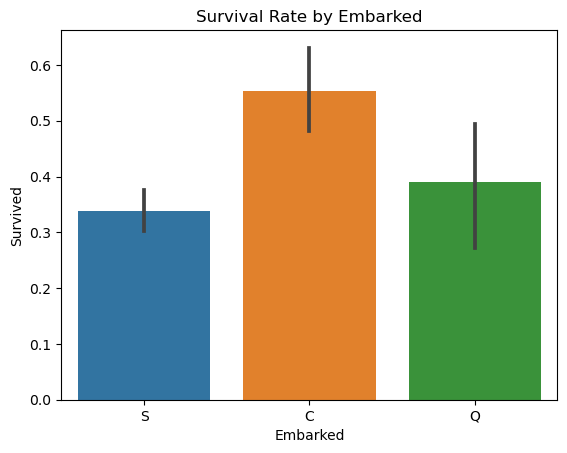

In [56]:
# Analyzing Categorical Variables

# Visualize the survival rate based on Pclass, Sex, and Embarked.

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by Sex
sns.barplot(x='Gender', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked')
plt.show()


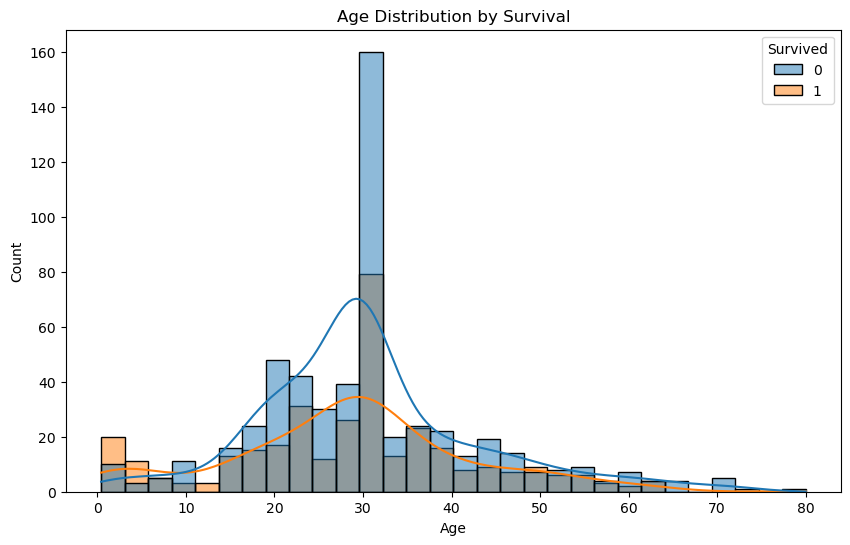

In [57]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()


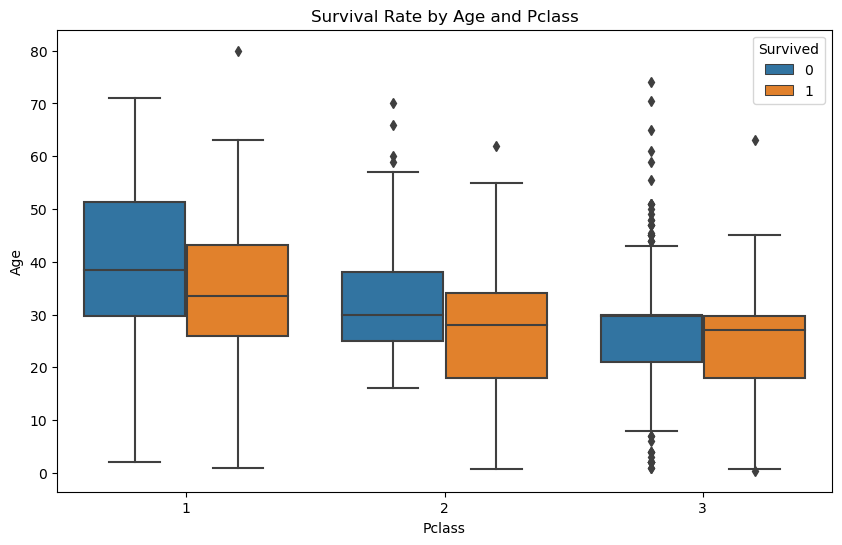

In [58]:
# Survival rate by Age and Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Survival Rate by Age and Pclass')
plt.show()

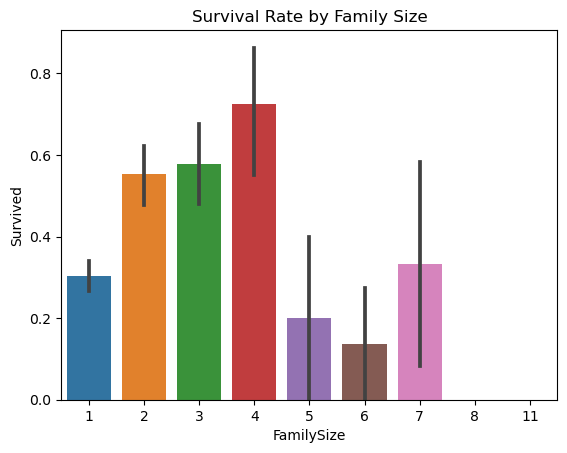

In [63]:
# Survival rate by FamilySize
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()


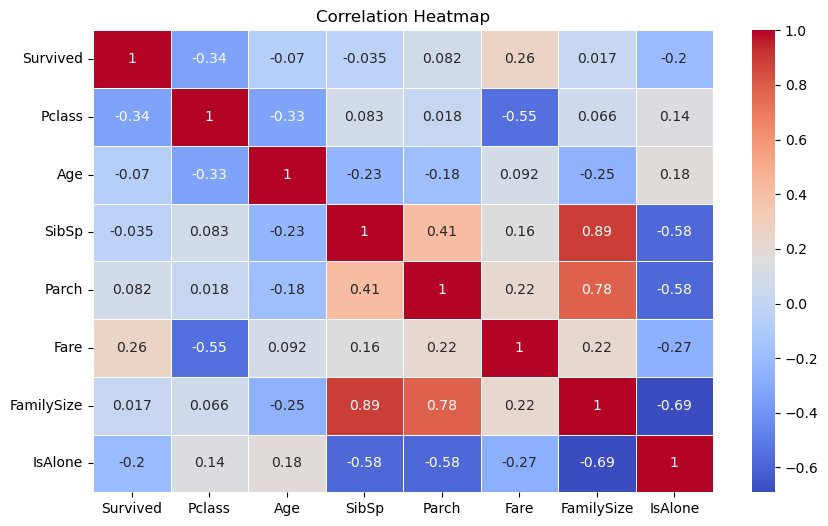

In [64]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

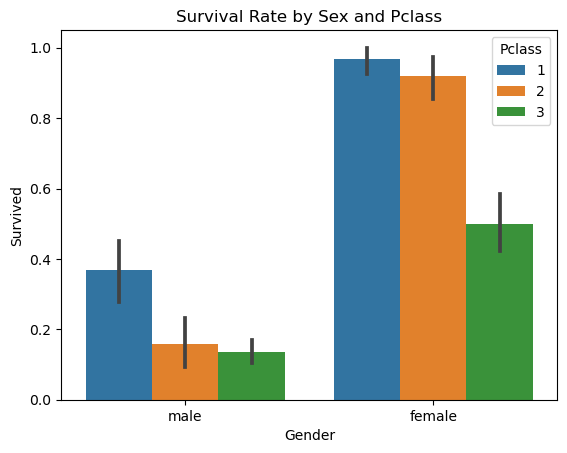

In [65]:
# Survival rate by Sex and Pclass
sns.barplot(x='Gender', y='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Sex and Pclass')
plt.show()

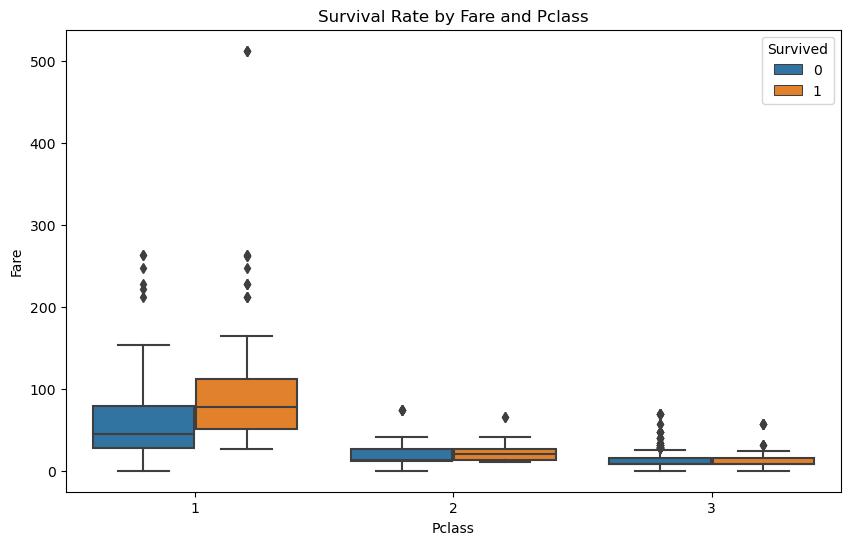

In [66]:
# Survival rate by Fare and Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Survival Rate by Fare and Pclass')
plt.show()

### Conclusion

Let's summarize the relationships, patterns, and trends identified from the exploratory data analysis (EDA) of the Titanic dataset:

1 Survival Rate by Sex and Pclass:

The survival rate for females is significantly higher than for males across all passenger classes (Pclass). Females had a higher chance of survival. The survival rate decreases as the passenger class (Pclass) increases. Passengers in higher classes (1st class) had a better chance of survival compared to lower classes (2nd and 3rd class)

2 Survival Rate by Age, Sex, and Pclass:

Generally, children had a higher survival rate compared to adults, especially in the 2nd and 3rd classes.

3 Survival Rate by Age and Embarked:

The age distribution of survivors and non-survivors is similar across the different embarkation points (C = Cherbourg, Q = Queenstown, S = Southampton). There is no significant pattern suggesting a strong relationship between the port of embarkation and survival rate based on age.

4 Survival Rate by Fare and Pclass:

Passengers who paid a higher fare (indicating higher class) had a better survival rate within each passenger class. For each class, those who paid more (likely indicating a better cabin or location) had a slightly higher chance of survival. Overall, being female and belonging to a higher passenger class were associated with higher survival rates